In [36]:
import sys
sys.path.append('../../')
from search import search_local
import numpy as np
from tools.tools import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Get gaia catalogue

In [37]:
samples = search_local.get_entire_catalogue()

convert from cartesian to cylindrical

In [38]:
x, y, z, vx, vy, vz = samples.T
cylcoord = rect_to_cyl(x, y, z, vx, vy, vz)
R = cylcoord[:, 0]
z = cylcoord[:, 3]

Plot 2d histogram of gaia catalogue

Text(0,0.5,'z(kpc)')

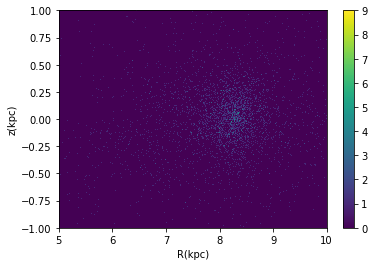

In [63]:
density_plot = plt.hist2d(R, z, bins = 10000, range = [[5.0, 10.0],[-1., 1.]])
plt.colorbar()
plt.xlabel('R(kpc)')
plt.ylabel('z(kpc)')

Define the true number density function

In [40]:
def n(Rz, n_0):
    R, z = Rz
    return n_0*np.exp(-R/3 - np.abs(z)/0.3)

Fit the function with real data when the stars are close; 0.05 kpc around sun

In [41]:
sun_galactic = np.array([0, 0, 0, 0, 0, 0])
close_stars = search_local.search_phase_space(*sun_galactic, epsilon = 0.05, v_scale = 0)
x_close, y_close, z_close, vx_close, vy_close, vz_close = samples.T
cyl_close_coord = rect_to_cyl(x_close, y_close, z_close, vx_close, vy_close, vz_close)
R_close = cyl_close_coord[:, 0]
z_close = cyl_close_coord[:, 3]

In [42]:
function_input = np.array([R_close, z_close])
np.shape(function_input)
#curve_fit(n, function_input, 

(2, 6376803)

In [50]:
h, xedges, yedges, graph = density_plot

148.0